In [ ]:
#import the relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime as dt

In [ ]:
# read the dataset into memory using only relevant columns
df=pd.read_csv('/content/drive/MyDrive/Azubi datasets/nyc-parking-violations-2020.csv',usecols=['Plate ID','Registration State','Issue Date','Vehicle Make','Issuing Agency','Violation Location','Violation Time','Violation County','Unregistered Vehicle?','No Standing or Stopping Violation','Hydrant Violation','Double Parking Violation'])

In [ ]:
#lets look at the first 15 dataset 
df.head(15)

,Plate ID,Registration State,Issue Date,Vehicle Make,Issuing Agency,Violation Location,Violation Time,Violation County,Unregistered Vehicle?,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,J58JKX,NJ,05/08/1972 12:00:00 AM,HONDA,P,72.0,0523P,K,0.0,NaN,NaN,NaN
1,KRE6058,PA,08/29/1977 12:00:00 AM,ME/BE,P,77.0,0428P,K,0.0,NaN,NaN,NaN
2,444326R,NJ,10/03/1988 12:00:00 AM,LEXUS,P,88.0,0625A,K,0.0,NaN,NaN,NaN
3,F728330,OH,01/03/1990 12:00:00 AM,CHEVR,P,90.0,1106A,K,0.0,NaN,NaN,NaN
4,FMY9090,NY,02/14/1990 12:00:00 AM,JEEP,S,90.0,1253A,K,0.0,NaN,NaN,NaN
5,KDG0693,PA,07/21/1990 12:00:00 AM,HYUN,P,100.0,0525P,Q,0.0,NaN,NaN,NaN
6,79928MG,NY,09/19/1990 12:00:00 AM,INTER,P,1.0,1120A,NY,0.0,NaN,NaN,NaN
7,JJJ8186,NY,10/14/1990 12:00:00 AM,BMW,P,52.0,0320A,BX,0.0,NaN,NaN,NaN
8,DKD6024,NC,07/25/1991 12:00:00 AM,FORD,P,68.0,0843P,K,0.0,NaN,NaN,NaN
9,6542FR,99,01/01/2000 12:00:00 AM,CMCKU,P,17.0,0739P,NaN,0.0,NaN,NaN,NaN


In [ ]:
#...and the size of the data
print(f'data has a size of {df.shape[0]:,} rows and {df.shape[1]} columns')

data has a size of 12,495,734 rows and 12 columns


In [ ]:
# lets get some info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495734 entries, 0 to 12495733
Data columns (total 12 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Plate ID                           object 
 1   Registration State                 object 
 2   Issue Date                         object 
 3   Vehicle Make                       object 
 4   Issuing Agency                     object 
 5   Violation Location                 float64
 6   Violation Time                     object 
 7   Violation County                   object 
 8   Unregistered Vehicle?              float64
 9   No Standing or Stopping Violation  float64
 10  Hydrant Violation                  float64
 11  Double Parking Violation           float64
dtypes: float64(5), object(7)
memory usage: 1.1+ GB


In [ ]:
#lets find all the null values
df.isnull().sum()


Plate ID                                  202
Registration State                          0
Issue Date                                  0
Vehicle Make                            62420
Issuing Agency                              0
Violation Location                    4538543
Violation Time                            278
Violation County                        40883
Unregistered Vehicle?                11696719
No Standing or Stopping Violation    12495734
Hydrant Violation                    12495734
Double Parking Violation             12495734
dtype: int64

We have a lot of null values however some columns have all values as null let's drop these columns

In [ ]:
df.drop(axis=1,columns=['Unregistered Vehicle?', 'No Standing or Stopping Violation','Hydrant Violation','Double Parking Violation'], inplace=True)

In [ ]:
# now let's drop all nan values

df.dropna(inplace=True)

In [ ]:
# lets have a second look at our data info now

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7874541 entries, 0 to 12495733
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Plate ID            object 
 1   Registration State  object 
 2   Issue Date          object 
 3   Vehicle Make        object 
 4   Issuing Agency      object 
 5   Violation Location  float64
 6   Violation Time      object 
 7   Violation County    object 
dtypes: float64(1), object(7)
memory usage: 540.7+ MB


In [ ]:
#let's check null values again

df.isnull().sum()

Plate ID              0
Registration State    0
Issue Date            0
Vehicle Make          0
Issuing Agency        0
Violation Location    0
Violation Time        0
Violation County      0
dtype: int64

Let's do some analysis on the data now

In [ ]:
#let's do a describe to see basic stats of the data

df.describe()

,Violation Location
count,7.874541e+06
mean,5.560202e+01
std,3.933919e+01
min,1.000000e+00
25%,1.800000e+01
50%,4.900000e+01
75%,9.000000e+01
max,9.010000e+02


In [ ]:
#Let's Transpose 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Violation Location,7874541.0,55.602023,39.339188,1.0,18.0,49.0,90.0,901.0


In [ ]:
#let's look at the unique values in registration state

df['Registration State'].unique()

array(['NJ', 'PA', 'OH', 'NY', 'NC', 'ME', 'CT', 'IN', 'IL', 'FL', '99',
       'VA', 'MA', 'ID', 'CA', 'NE', 'HI', 'OK', 'AL', 'WA', 'VT', 'WY',
       'WI', 'NH', 'MD', 'KY', 'GA', 'TX', 'RI', 'AR', 'TN', 'AZ', 'SC',
       'NV', 'QB', 'DE', 'MS', 'MN', 'MO', 'OR', 'MI', 'NM', 'UT', 'ON',
       'DP', 'GV', 'CO', 'SD', 'IA', 'WV', 'MX', 'DC', 'LA', 'NB', 'KS',
       'ND', 'MT', 'AK', 'AB', 'PR', 'PE', 'BC', 'SK', 'NS', 'FO', 'NT',
       'MB', 'YT'], dtype=object)

In [ ]:
#lets check the states and their violations
state_counter=Counter()

state_counter.update(df['Registration State'])

print(state_counter)

Counter({'NY': 5945181, 'NJ': 778155, 'PA': 212550, 'IN': 131924, 'CT': 112649, 'FL': 99648, 'MA': 59924, 'VA': 49056, 'MD': 42781, 'TX': 42275, 'NC': 37783, 'ME': 29874, 'IL': 25599, 'GA': 25371, 'MN': 20970, 'AZ': 20152, 'OH': 19528, 'CA': 17404, '99': 17167, 'OK': 15677, 'SC': 14844, 'GV': 14618, 'TN': 14388, 'OR': 13439, 'WI': 11105, 'MI': 10481, 'DE': 10417, 'RI': 8302, 'AL': 8127, 'WA': 7666, 'NH': 6517, 'VT': 5712, 'ON': 5461, 'MO': 4132, 'QB': 3507, 'CO': 3142, 'LA': 3136, 'KY': 2794, 'DP': 2773, 'DC': 2468, 'WV': 2041, 'MS': 1836, 'IA': 1773, 'SD': 1396, 'AR': 1363, 'ID': 1206, 'NV': 1161, 'UT': 1157, 'KS': 1026, 'NM': 1023, 'NE': 1000, 'MT': 855, 'AK': 356, 'ND': 345, 'WY': 343, 'PR': 308, 'AB': 154, 'NS': 109, 'BC': 97, 'HI': 95, 'NB': 81, 'FO': 55, 'MB': 29, 'PE': 17, 'SK': 8, 'MX': 5, 'NT': 3, 'YT': 2})


Text(0, 0.5, 'number of violations')

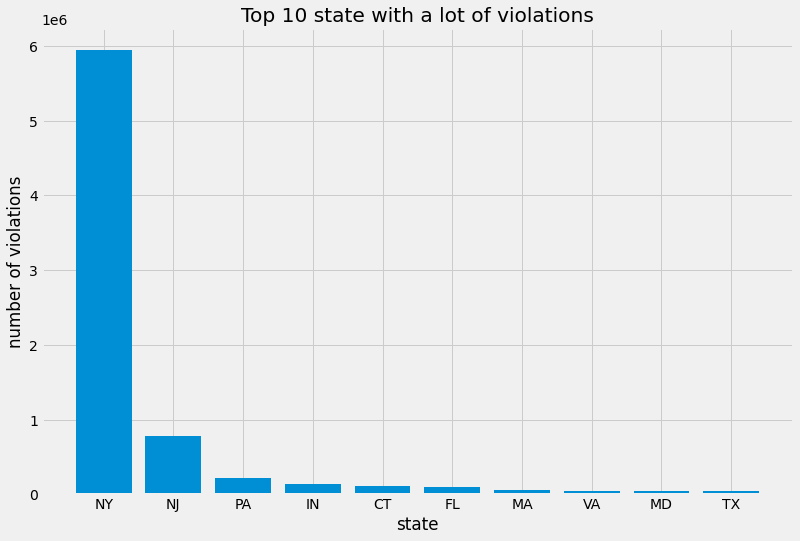

In [ ]:
# which state has a lot of violations (Top 10)

state=[]
number_violations=[]

for items in state_counter.most_common(10):
  state.append(items[0])
  number_violations.append(items[1])


fig=plt.figure()
fig.set_size_inches(12,8)
plt.style.use('fivethirtyeight')
plt.bar(state,number_violations)

plt.title('Top 10 state with a lot of violations')

plt.xlabel('state')
plt.ylabel('number of violations')



